# Libraries

In [1]:
import os
import json

from PIL import Image
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

from torch import Tensor
from torch.nn.functional import cosine_similarity
from transformers import ViTFeatureExtractor, ViTModel

# Model

In [2]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

/home/ekremezm/.local/lib/python3.8/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


# Similarity Example

In [3]:
img_path = "../example_images/adidas_predator_edge_1.jpg"
image = Image.open(img_path)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs_1 = model(**inputs)

In [4]:
img_path = "../example_images/adidas_predator_edge_3.jpg"
image = Image.open(img_path)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs_2 = model(**inputs)

In [5]:
cosine_similarity(outputs_1.pooler_output, outputs_2.pooler_output).item()

0.8075655698776245

# Pipeline Process Example

In [6]:
data_path = "../../DORA-DATA"

json_path = os.path.join(data_path, "data.json")
images_path = os.path.join(data_path, "images")

In [7]:
categories = json.load(open(json_path))

## Data Feature Extraction

In [20]:
image_paths, features = list(), list()
for row in tqdm(categories):
    if not row.get("thumb_image").get("path"):
        continue

    image_path = os.path.join(images_path, row.get("thumb_image").get("path"))
    
    if not os.path.exists(image_path):
        continue
    
    image = Image.open(image_path)

    if len(image.size)==2:
        image = image.convert('RGB')

    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    feature_vector = outputs.pooler_output

    image_paths.append(image_path)
    features.append(feature_vector.tolist()[0])

  0%|          | 0/2268 [00:00<?, ?it/s]

In [55]:
source_image_path = "../example_images/kendall_jenner.jpg"
image = Image.open(source_image_path)
inputs = feature_extractor(images=image, return_tensors="pt")
source_feature = model(**inputs).pooler_output

In [22]:
features = Tensor(features)

In [56]:
sorted_similarities = cosine_similarity(features, source_feature).sort(descending=True)

In [57]:
indices = sorted_similarities.indices.tolist()
ratios = sorted_similarities.values.tolist()

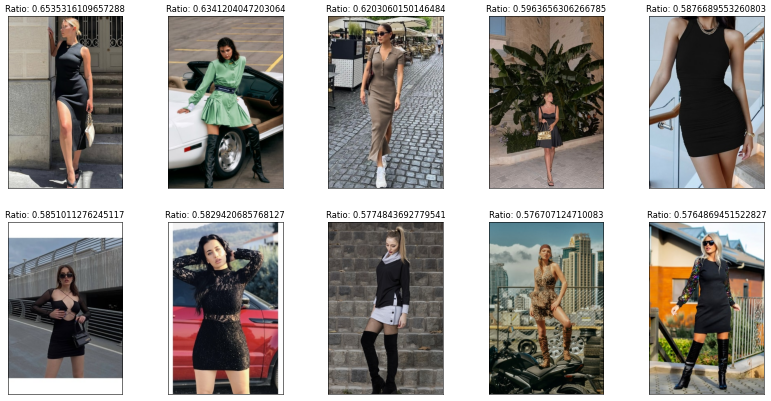

In [58]:
plt.figure(figsize = (20, 10), dpi = 50, facecolor = 'white', edgecolor = 'gray')
for i in range(10):
    plt.subplot(2, 5, i+1)

    index = indices[i]
    ratio = ratios[i]
    image_path = image_paths[index]

    image = Image.open(image_path)
    plt.imshow(image)
    plt.title("Ratio: {}".format(ratio))
    plt.xticks([]), plt.yticks([])
